**Necessary imports**

In [ ]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin

# About the Data

The dataset contains two folders, whereas one contains the data for the controls and one for the condition group. For each patient a csv file has been provided containing the actigraph data collected over time. The columns are: timestamp (one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). In addition, the MADRS scores are provided in the file "scores.csv". It contains the following columns; number (patient identifier), days (number of days of measurements), gender (1 or 2 for female or male), age (age in age groups), afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I), melanch (1: melancholia, 2: no melancholia), inpatient (1: inpatient, 2: outpatient), edu (education grouped in years), marriage (1: married or cohabiting, 2: single), work (1: working or studying, 2: unemployed/sick leave/pension), madrs1 (MADRS score when measurement started), madrs2 (MADRS when measurement stopped).


# Loading the Dataset

In [ ]:
control_1= pd.read_csv('/content/drive/MyDrive/Lumiere/Data/control/control_1.csv')
condition_1= pd.read_csv('/content/drive/MyDrive/Lumiere/Data/condition/condition_1.csv')

# Exploring Data

In [ ]:
f"Control_1 shape {control_1.shape}"


'Control_1 shape (51611, 3)'

In [ ]:
f"Condition_1 shape {condition_1.shape}"

'Condition_1 shape (23244, 3)'

In [ ]:
condition_1.head(3)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0


In [ ]:
control_1.head(3)

,timestamp,date,activity
0,2003-03-18 15:00:00,2003-03-18,60
1,2003-03-18 15:01:00,2003-03-18,0
2,2003-03-18 15:02:00,2003-03-18,264


In [ ]:
condition_1.describe()

,activity
count,23244.000000
mean,146.948030
std,294.592424
min,0.000000
25%,0.000000
50%,9.000000
75%,172.000000
max,3526.000000


In [ ]:
condition_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23244 entries, 0 to 23243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  23244 non-null  object
 1   date       23244 non-null  object
 2   activity   23244 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 544.9+ KB


# Dealing with Skewness

Skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution.
From the graph it can be seen that the data is highly and positively skewed. Positive Skewness means when the tail on the right side of the distribution is longer or fatter.

 If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

**Effect of high skewness**
>Highly skewed data degrades the model’s ability (especially regression based models) to describe typical cases as it has to deal with rare cases on extreme values. ie right skewed data will predict better on data points with lower value as compared to those with higher values. Skewed data also does not work well with many statistical methods.

To check skew in data, we use skew() function. And to deal with skewed data we have following solution:


1.   Log Transformation
2.   Remove Outliers
3. Normalize(min-max) etc.




***For Condition_1***

<Axes: xlabel='activity', ylabel='Count'>

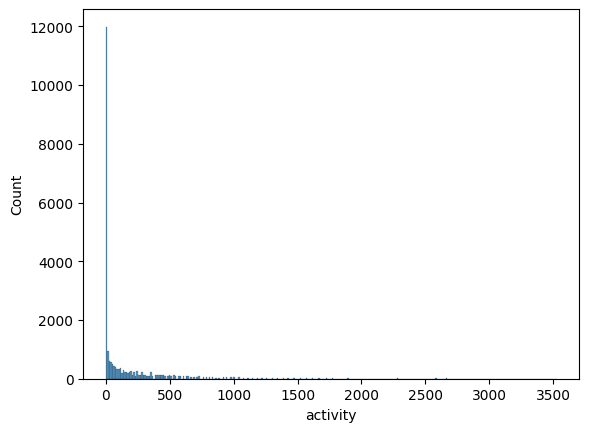

In [ ]:
sns.histplot(x='activity', data=condition_1,  fill=True)

The above graph seems to have tail on right side denoting high skewness and poor distribution.

In [ ]:
condition_1['activity'].skew()


3.8823677090908344

In [ ]:
condition_1['log_activity'] = np.log(condition_1['activity'] + 1) # add + 1 because log(0) is infinity
condition_1['log_activity'].skew()

0.2771381485812395

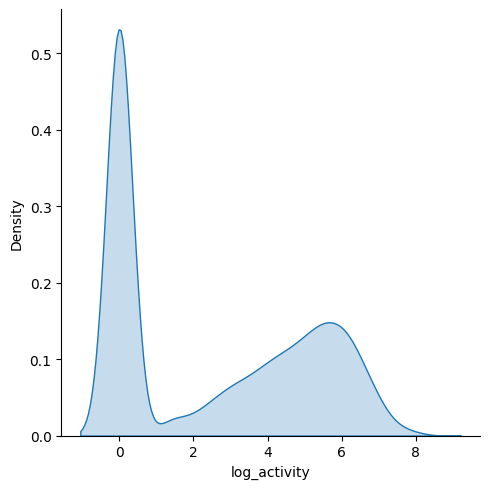

In [ ]:
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [ ]:
condition_1.head(3)

,timestamp,date,activity,log_activity
0,2003-05-07 12:00:00,2003-05-07,0,0.000000
1,2003-05-07 12:01:00,2003-05-07,143,4.969813
2,2003-05-07 12:02:00,2003-05-07,0,0.000000


***For control_1***

In [ ]:
control_1['activity'].skew()


5.039169993104665

In [ ]:
control_1['log_activity'] = np.log(control_1['activity'] + 1) # add + 1 because log(0) is infinity
control_1['log_activity'].skew()

1.2517081703386566

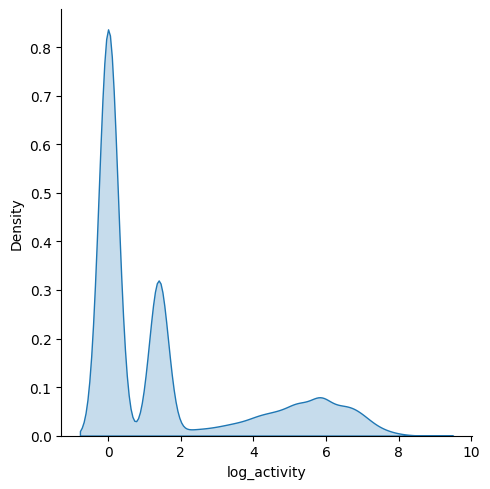

In [ ]:
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)